In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

# Feature (MFCC) extraction (Dataset generation)

In [2]:
# run this function if you need to generate a csv data set from scratch
data_loader.generate_csv_dataset()

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}
INFO: n_fft=32768
{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}


100%|██████████| 1440/1440 [08:42<00:00,  2.76it/s]

--- Data loaded. Loading time: 522.5950882434845 seconds ---
X.shape =  (1440, 80)
y.shape =  (1440, 1)
ID.shape =  (1440, 1)


('data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_32768.csv',
 'data/y_labels_32768.csv',
 'data/IDs_32768.csv')

# Loading Dataset

In [3]:
# X, y, ID = data_loader.load_dataset()
# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv', 
#                                     y_path='data/y_labels_4096.csv',
#                                     ID_path='data/IDs_4096.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192.csv', 
#                                     y_path='data/y_labels_8192.csv',
#                                     ID_path='data/IDs_8192.csv')

# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_16384.csv', 
#                                     y_path='data/y_labels_16384.csv',
#                                     ID_path='data/IDs_16384.csv')

X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_32768.csv', 
                                    y_path='data/y_labels_32768.csv',
                                    ID_path='data/IDs_32768.csv')

# ID['0'].unique()    # actors
group_members= data_loader.get_k_fold_group_member()
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
# print(len(X_k_folds))

data loaded in 0.04064536094665527ms
          0         1         2         3         4         5         6  \
0 -1.277400  0.740545  0.352890  1.303329  1.570590  0.886446  0.413609   
1 -1.223551  0.807101  0.327566  1.660219  1.536089  0.786721  1.039768   
2 -1.043850  1.298227  0.564173  0.925245  0.298242  0.977380  1.291029   
3 -0.915982  1.206138  0.618249  0.651573  0.201551  0.976954  1.323689   
4 -1.458995  0.761145  0.664487  1.709041  1.916380  1.218140  0.200085   

          7         8         9  ...        70        71        72        73  \
0  0.708754 -0.975593 -0.866717  ... -0.663033 -1.011439 -0.529699 -0.822591   
1  0.298061 -0.952100 -0.382496  ... -0.899073 -0.953583 -0.611787 -0.864029   
2  0.675669 -0.753631 -1.818974  ... -0.445312 -0.966770 -1.050814 -1.006110   
3 -0.018322 -0.705458 -1.329476  ... -0.375132 -1.182742 -0.524209 -0.929997   
4  0.688065 -0.077817 -1.134973  ... -1.019907 -1.152076 -0.399957 -1.001348   

         74        75        76

# GridSearch SVM-RBF

In [10]:
# del UAR_surf, UAR_list

In [4]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

100%|██████████| 5/5 [00:01<00:00,  4.53it/s]


UAR = 0.338
C = 0.100000, gamma = 0.000316


100%|██████████| 5/5 [00:01<00:00,  4.48it/s]


UAR = 0.342
C = 0.100000, gamma = 0.000527


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


UAR = 0.343
C = 0.100000, gamma = 0.000880


100%|██████████| 5/5 [00:01<00:00,  4.33it/s]


UAR = 0.344
C = 0.100000, gamma = 0.001468


100%|██████████| 5/5 [00:01<00:00,  4.54it/s]


UAR = 0.350
C = 0.100000, gamma = 0.002448


100%|██████████| 5/5 [00:01<00:00,  4.64it/s]


UAR = 0.359
C = 0.100000, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  4.58it/s]


UAR = 0.368
C = 0.100000, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.60it/s]


UAR = 0.368


100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


UAR = 0.331


100%|██████████| 5/5 [00:01<00:00,  4.36it/s]


UAR = 0.271


100%|██████████| 5/5 [00:01<00:00,  4.61it/s]


UAR = 0.338


100%|██████████| 5/5 [00:01<00:00,  4.55it/s]


UAR = 0.342


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


UAR = 0.342


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


UAR = 0.348


100%|██████████| 5/5 [00:01<00:00,  4.65it/s]


UAR = 0.364


100%|██████████| 5/5 [00:01<00:00,  4.86it/s]


UAR = 0.387
C = 0.187382, gamma = 0.004084


100%|██████████| 5/5 [00:01<00:00,  4.83it/s]


UAR = 0.398
C = 0.187382, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.79it/s]


UAR = 0.398


100%|██████████| 5/5 [00:01<00:00,  4.43it/s]


UAR = 0.366


100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


UAR = 0.276


100%|██████████| 5/5 [00:01<00:00,  4.58it/s]


UAR = 0.339


100%|██████████| 5/5 [00:01<00:00,  4.59it/s]


UAR = 0.343


100%|██████████| 5/5 [00:01<00:00,  4.66it/s]


UAR = 0.352


100%|██████████| 5/5 [00:01<00:00,  4.78it/s]


UAR = 0.372


100%|██████████| 5/5 [00:01<00:00,  4.77it/s]


UAR = 0.403
C = 0.351119, gamma = 0.002448


100%|██████████| 5/5 [00:00<00:00,  5.13it/s]


UAR = 0.414
C = 0.351119, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.15it/s]


UAR = 0.424
C = 0.351119, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.97it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  4.69it/s]


UAR = 0.399


100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


UAR = 0.320


100%|██████████| 5/5 [00:01<00:00,  4.61it/s]


UAR = 0.344


100%|██████████| 5/5 [00:01<00:00,  4.73it/s]


UAR = 0.356


100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


UAR = 0.384


100%|██████████| 5/5 [00:01<00:00,  4.96it/s]


UAR = 0.410


100%|██████████| 5/5 [00:00<00:00,  5.25it/s]


UAR = 0.428
C = 0.657933, gamma = 0.002448


100%|██████████| 5/5 [00:00<00:00,  5.50it/s]


UAR = 0.438
C = 0.657933, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.49it/s]


UAR = 0.441
C = 0.657933, gamma = 0.006813


100%|██████████| 5/5 [00:00<00:00,  5.19it/s]


UAR = 0.442
C = 0.657933, gamma = 0.011365


100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


UAR = 0.419


100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


UAR = 0.376


100%|██████████| 5/5 [00:01<00:00,  4.80it/s]


UAR = 0.362


100%|██████████| 5/5 [00:00<00:00,  5.02it/s]


UAR = 0.393


100%|██████████| 5/5 [00:00<00:00,  5.07it/s]


UAR = 0.407


100%|██████████| 5/5 [00:00<00:00,  5.42it/s]


UAR = 0.421


100%|██████████| 5/5 [00:00<00:00,  5.58it/s]


UAR = 0.438


100%|██████████| 5/5 [00:00<00:00,  5.63it/s]


UAR = 0.447
C = 1.232847, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.65it/s]


UAR = 0.463
C = 1.232847, gamma = 0.006813


100%|██████████| 5/5 [00:00<00:00,  5.20it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  4.28it/s]


UAR = 0.438


100%|██████████| 5/5 [00:01<00:00,  3.98it/s]


UAR = 0.404


100%|██████████| 5/5 [00:00<00:00,  5.05it/s]


UAR = 0.404


100%|██████████| 5/5 [00:00<00:00,  5.26it/s]


UAR = 0.410


100%|██████████| 5/5 [00:00<00:00,  5.53it/s]


UAR = 0.421


100%|██████████| 5/5 [00:00<00:00,  5.78it/s]


UAR = 0.430


100%|██████████| 5/5 [00:00<00:00,  5.93it/s]


UAR = 0.451


100%|██████████| 5/5 [00:00<00:00,  5.96it/s]


UAR = 0.464
C = 2.310130, gamma = 0.004084


100%|██████████| 5/5 [00:00<00:00,  5.76it/s]


UAR = 0.467
C = 2.310130, gamma = 0.006813


100%|██████████| 5/5 [00:01<00:00,  4.62it/s]


UAR = 0.454


100%|██████████| 5/5 [00:01<00:00,  4.04it/s]


UAR = 0.434


100%|██████████| 5/5 [00:01<00:00,  4.01it/s]


UAR = 0.400


100%|██████████| 5/5 [00:00<00:00,  5.37it/s]


UAR = 0.413


100%|██████████| 5/5 [00:00<00:00,  5.54it/s]


UAR = 0.424


100%|██████████| 5/5 [00:00<00:00,  5.86it/s]


UAR = 0.423


100%|██████████| 5/5 [00:00<00:00,  6.02it/s]


UAR = 0.454


100%|██████████| 5/5 [00:00<00:00,  6.07it/s]


UAR = 0.462


100%|██████████| 5/5 [00:00<00:00,  5.82it/s]


UAR = 0.464


100%|██████████| 5/5 [00:00<00:00,  5.34it/s]


UAR = 0.457


100%|██████████| 5/5 [00:01<00:00,  4.39it/s]


UAR = 0.455


100%|██████████| 5/5 [00:01<00:00,  4.09it/s]


UAR = 0.431


100%|██████████| 5/5 [00:01<00:00,  4.05it/s]


UAR = 0.400


100%|██████████| 5/5 [00:00<00:00,  5.67it/s]


UAR = 0.426


100%|██████████| 5/5 [00:00<00:00,  5.95it/s]


UAR = 0.432


100%|██████████| 5/5 [00:00<00:00,  6.11it/s]


UAR = 0.452


100%|██████████| 5/5 [00:00<00:00,  6.12it/s]


UAR = 0.454


100%|██████████| 5/5 [00:00<00:00,  5.98it/s]


UAR = 0.460


100%|██████████| 5/5 [00:00<00:00,  5.92it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  4.96it/s]


UAR = 0.454


100%|██████████| 5/5 [00:01<00:00,  4.38it/s]


UAR = 0.454


100%|██████████| 5/5 [00:01<00:00,  4.00it/s]


UAR = 0.432


100%|██████████| 5/5 [00:01<00:00,  4.02it/s]


UAR = 0.400


100%|██████████| 5/5 [00:00<00:00,  5.94it/s]


UAR = 0.438


100%|██████████| 5/5 [00:00<00:00,  6.14it/s]


UAR = 0.447


100%|██████████| 5/5 [00:00<00:00,  6.16it/s]


UAR = 0.450


100%|██████████| 5/5 [00:00<00:00,  6.09it/s]


UAR = 0.462


100%|██████████| 5/5 [00:00<00:00,  6.15it/s]


UAR = 0.461


100%|██████████| 5/5 [00:00<00:00,  5.61it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  4.85it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  4.28it/s]


UAR = 0.453


100%|██████████| 5/5 [00:01<00:00,  4.04it/s]


UAR = 0.432


100%|██████████| 5/5 [00:01<00:00,  4.03it/s]


UAR = 0.400


100%|██████████| 5/5 [00:00<00:00,  6.23it/s]


UAR = 0.446


100%|██████████| 5/5 [00:00<00:00,  6.28it/s]


UAR = 0.439


100%|██████████| 5/5 [00:00<00:00,  6.14it/s]


UAR = 0.454


100%|██████████| 5/5 [00:00<00:00,  6.24it/s]


UAR = 0.447


100%|██████████| 5/5 [00:00<00:00,  5.98it/s]


UAR = 0.455


100%|██████████| 5/5 [00:00<00:00,  5.32it/s]


UAR = 0.451


100%|██████████| 5/5 [00:01<00:00,  4.80it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  4.28it/s]


UAR = 0.453


100%|██████████| 5/5 [00:01<00:00,  4.08it/s]


UAR = 0.432


100%|██████████| 5/5 [00:01<00:00,  3.94it/s]


UAR = 0.400


100%|██████████| 5/5 [00:00<00:00,  6.25it/s]


UAR = 0.449


100%|██████████| 5/5 [00:00<00:00,  6.42it/s]


UAR = 0.452


100%|██████████| 5/5 [00:00<00:00,  5.95it/s]


UAR = 0.449


100%|██████████| 5/5 [00:00<00:00,  6.03it/s]


UAR = 0.457


100%|██████████| 5/5 [00:00<00:00,  5.69it/s]


UAR = 0.454


100%|██████████| 5/5 [00:00<00:00,  5.03it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  4.88it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  4.36it/s]


UAR = 0.453


100%|██████████| 5/5 [00:01<00:00,  4.10it/s]


UAR = 0.432


100%|██████████| 5/5 [00:01<00:00,  3.99it/s]


UAR = 0.400


100%|██████████| 5/5 [00:00<00:00,  6.04it/s]


UAR = 0.445


100%|██████████| 5/5 [00:00<00:00,  6.14it/s]


UAR = 0.456


100%|██████████| 5/5 [00:00<00:00,  5.99it/s]


UAR = 0.450


100%|██████████| 5/5 [00:00<00:00,  5.66it/s]


UAR = 0.461


100%|██████████| 5/5 [00:00<00:00,  5.63it/s]


UAR = 0.460


100%|██████████| 5/5 [00:00<00:00,  5.23it/s]


UAR = 0.452


100%|██████████| 5/5 [00:01<00:00,  4.85it/s]


UAR = 0.456


100%|██████████| 5/5 [00:01<00:00,  4.31it/s]


UAR = 0.453


100%|██████████| 5/5 [00:01<00:00,  4.03it/s]


UAR = 0.432


100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

UAR = 0.400
UAR_best = 0.467, C_best = 2.310130, gamma_best = 0.006813


## Result visualization

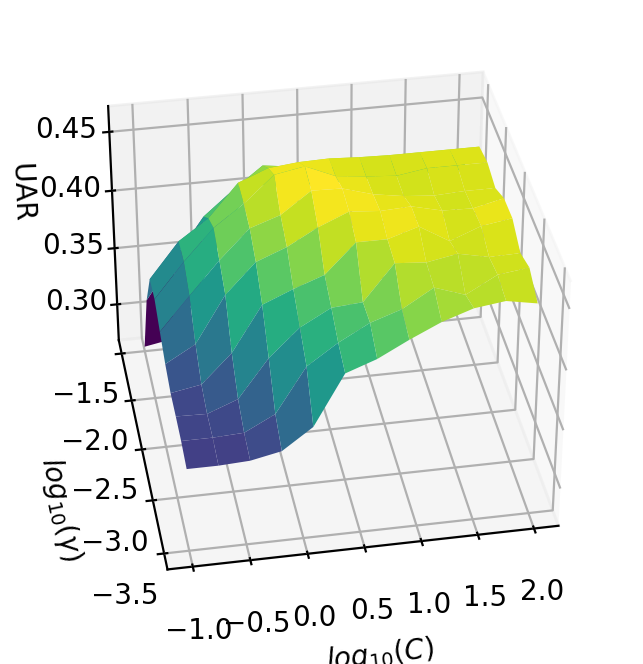

In [5]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')                
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
# ax.set_title('UAR')
ax.set_zlabel('$\mathrm{UAR}$')
ax.view_init(35, 260)
# plt.show()
image_path = "Doc/figures/UAR_svm_rbf_4096.jpg"
fig.savefig(image_path, format='jpg', dpi=200, bbox_inches='tight', pad_inches=0.2)

# Confusion matrix

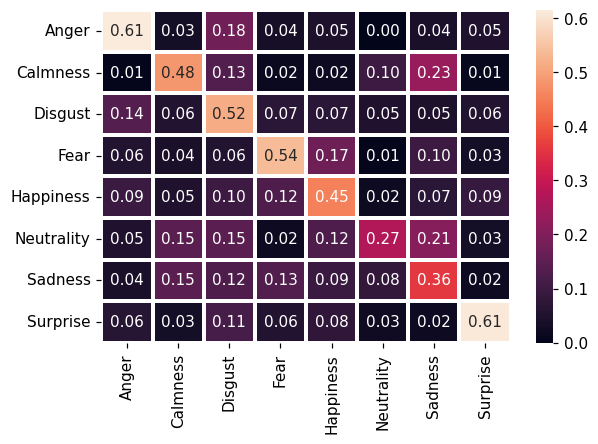

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [12]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)